<p style = "font-size : 50px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #bedcfa; border-radius: 5px 5px;"><strong>Chronic Kidney Disease Prediction</strong></p>

<img style="margin-left: 10%; float: center;  border:5px solid #ffb037; width:80%; height : 80%;" src = https://medicaldialogues.in/h-upload/2020/12/30/145030-chronic-kidney-disease.jpg> 

<a id = '0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Table of Contents</strong></p> 

* [EDA](#2.0)
* [Data Pre Processing](#3.0)
* [Feature Encoding](#4.0)
* [Model Building](#5.0)
    * [Knn](#5.1)
    * [Decision Tree Classifier](#5.2)
    * [Random Forest Classifier](#5.3)
    * [Ada Boost Classifier](#5.4)
    * [Gradient Boosting Classifier](#5.5)
    * [Stochastic Gradient Boosting (SGB)](#5.6)
    * [XgBoost](#5.7)
    * [Cat Boost Classifier](#5.8)
    * [Extra Trees Classifier](#5.9)
    * [LGBM Classifier](#5.10)

* [Models Comparison](#6.0)

In [0]:
# necessary imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

In [0]:
# Load the data into a Spark DataFrame
spark_df = spark.read.csv('/FileStore/tables/kidney_disease.csv', header=True, inferSchema=True)

# Show the first few rows of the DataFrame
spark_df.show()



+---+----+-----+-----+----+----+--------+--------+----------+----------+-----+-----+----+-----+----+----+----+-----+----+---+---+---+-----+---+---+--------------+
| id| age|   bp|   sg|  al|  su|     rbc|      pc|       pcc|        ba|  bgr|   bu|  sc|  sod| pot|hemo| pcv|   wc|  rc|htn| dm|cad|appet| pe|ane|classification|
+---+----+-----+-----+----+----+--------+--------+----------+----------+-----+-----+----+-----+----+----+----+-----+----+---+---+---+-----+---+---+--------------+
|  0|48.0| 80.0| 1.02| 1.0| 0.0|    null|  normal|notpresent|notpresent|121.0| 36.0| 1.2| null|null|15.4|  44| 7800| 5.2|yes|yes| no| good| no| no|           ckd|
|  1| 7.0| 50.0| 1.02| 4.0| 0.0|    null|  normal|notpresent|notpresent| null| 18.0| 0.8| null|null|11.3|  38| 6000|null| no| no| no| good| no| no|           ckd|
|  2|62.0| 80.0| 1.01| 2.0| 3.0|  normal|  normal|notpresent|notpresent|423.0| 53.0| 1.8| null|null| 9.6|  31| 7500|null| no|yes| no| poor| no|yes|           ckd|
|  3|48.0| 70.0|1.005|

In [0]:
df=spark_df.toPandas()
print(type(df))
display(df)

<class 'pandas.core.frame.DataFrame'>


id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.02,1.0,0.0,null,normal,notpresent,notpresent,121.0,36.0,1.2,null,null,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,null,normal,notpresent,notpresent,null,18.0,0.8,null,null,11.3,38,6000,null,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,null,null,9.6,31,7500,null,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,null,null,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,null,null,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.01,0.0,0.0,null,normal,notpresent,notpresent,100.0,54.0,24.0,104.0,4.0,12.4,36,null,null,no,no,no,good,no,no,ckd
7,24.0,null,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.1,null,null,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.9,null,null,10.8,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.02,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [0]:
# loading data

#df= pd.read_csv('../input/ckdisease/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,None,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,None,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,None,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,None,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [0]:
df.shape

Out[5]: (400, 26)

In [0]:
# dropping id column
df.drop('id', axis = 1, inplace = True)

In [0]:
# rename column names to make it more user-friendly

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [0]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,None,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,None,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,None,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,None,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [0]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>As we can see that 'packed_cell_volume', 'white_blood_cell_count' and 'red_blood_cell_count'  are object type. We need to change them to numerical dtype.</strong></p> 

In [0]:
# converting necessary columns to numerical type

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [0]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [0]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [None 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' None] values

pus_cell_clumps has ['notpresent' 'present' None] values

bacteria has ['notpresent' 'present' None] values

hypertension has ['yes' 'no' None] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' None] values

coronary_artery_disease has ['no' 'yes' '\tno' None] values

appetite has ['good' 'poor' None] values

peda_edema has ['no' 'yes' None] values

aanemia has ['no' 'yes' None] values

class has ['ckd' 'ckd\t' 'notckd'] values



<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>There is some ambugity present in the columns we have to remove that.</strong></p> 

In [0]:
# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [0]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [0]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' None] values

coronary_artery_disease has ['no' 'yes' None] values

class has [0 1] values



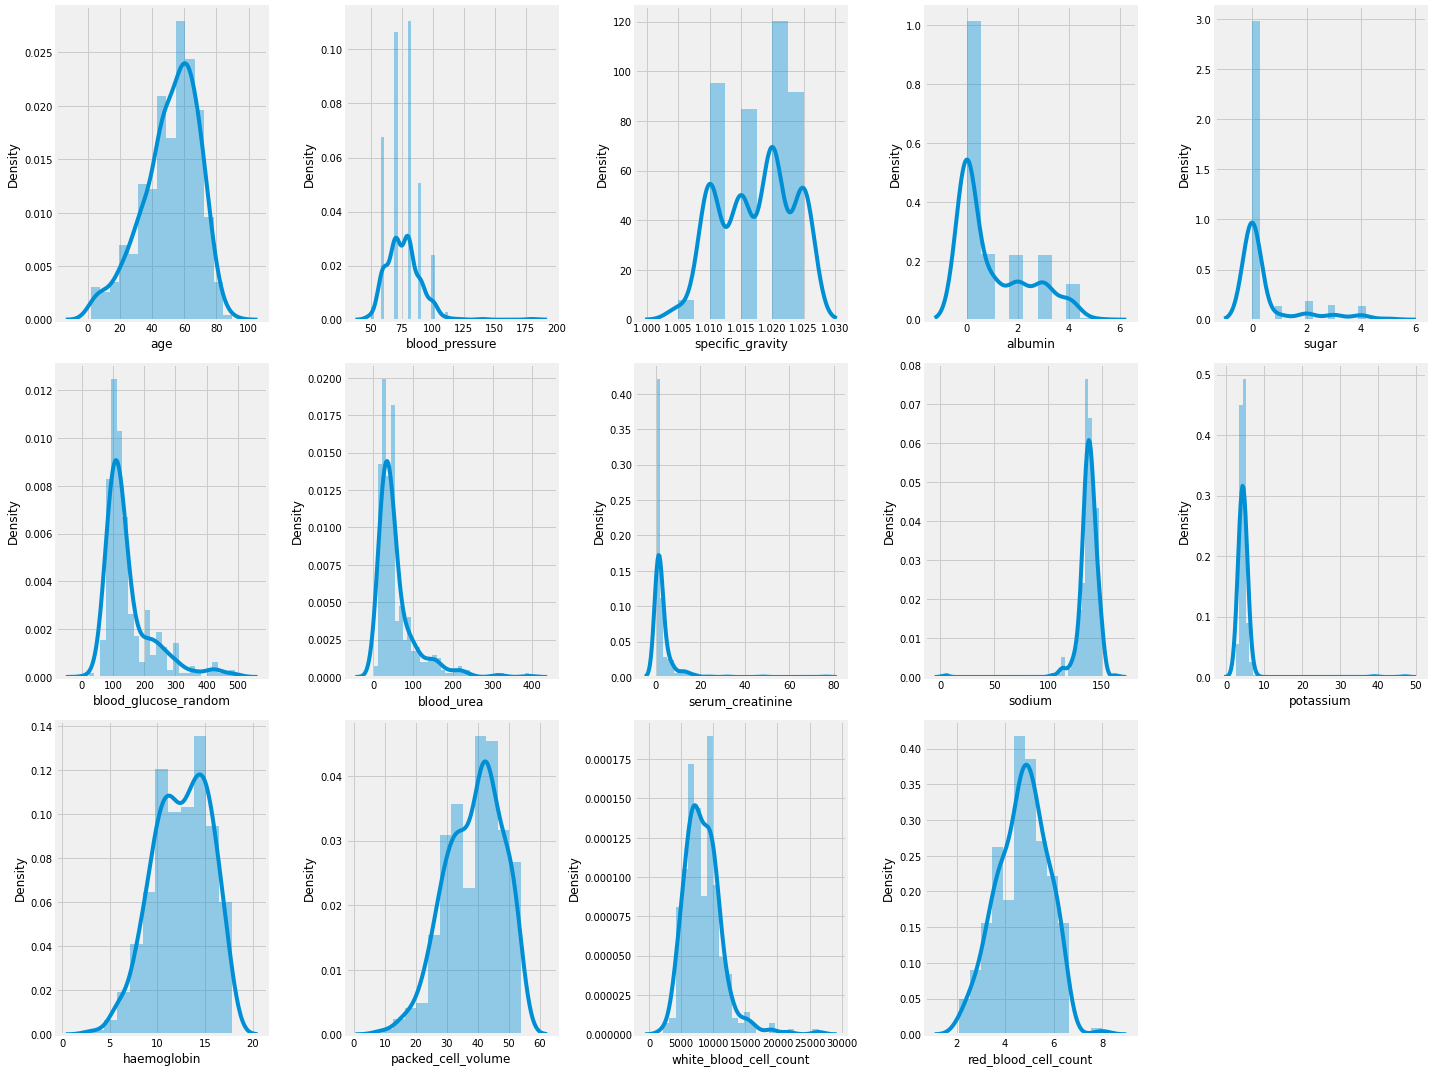

In [0]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Skewness is present in some of the columns.</strong></p> 

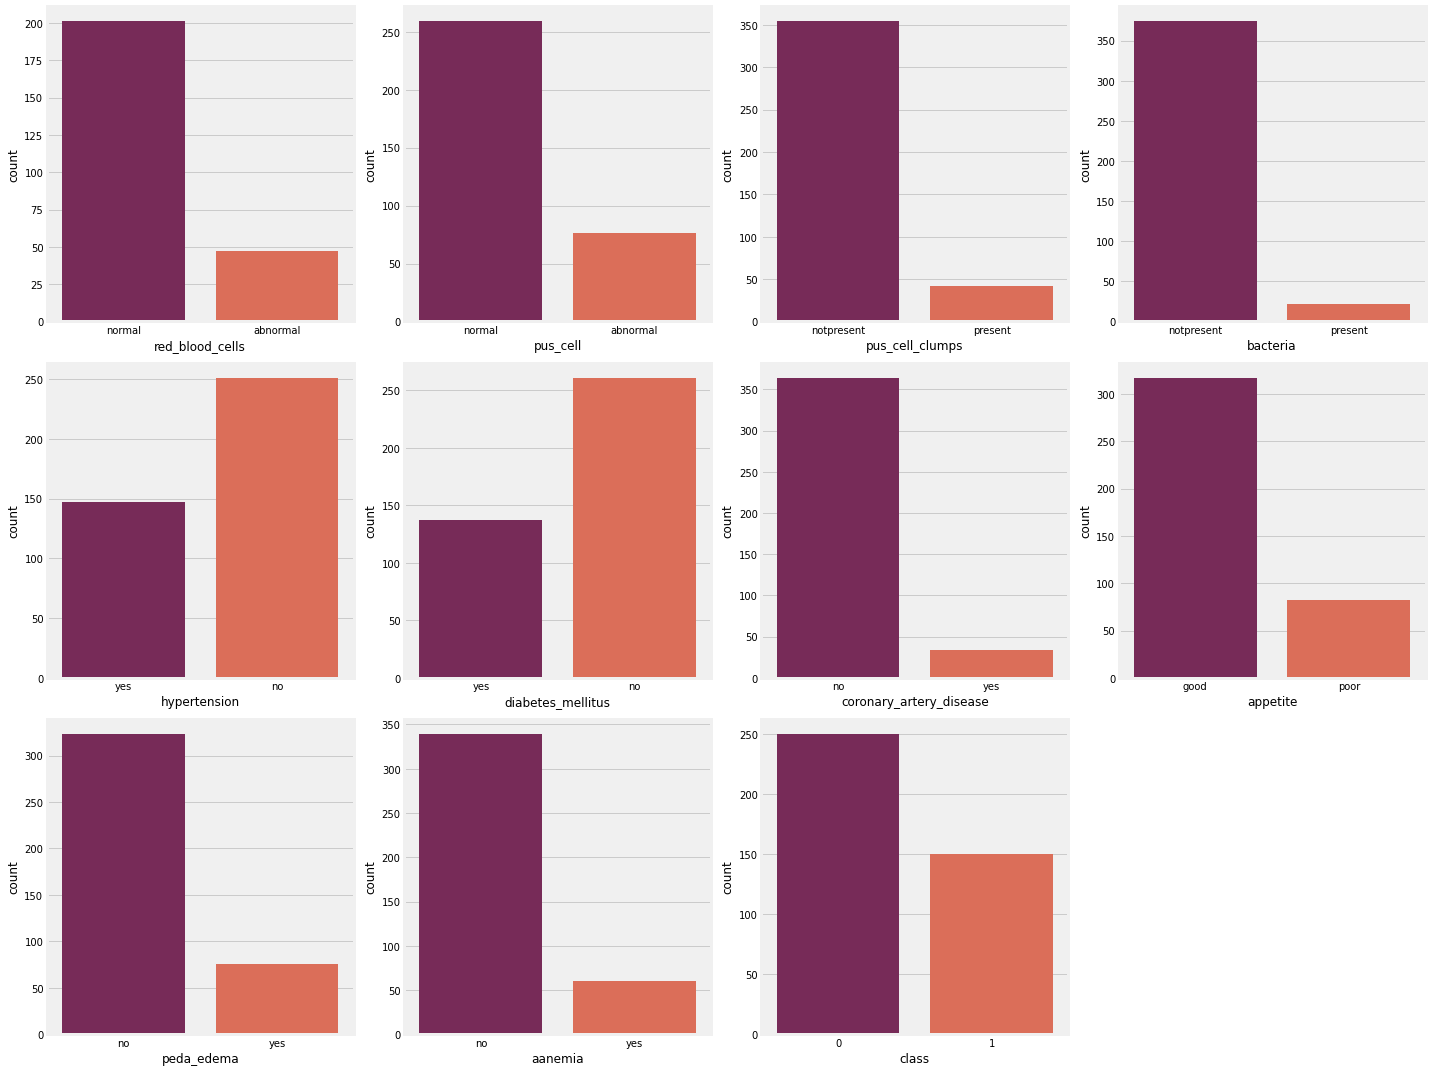

In [0]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

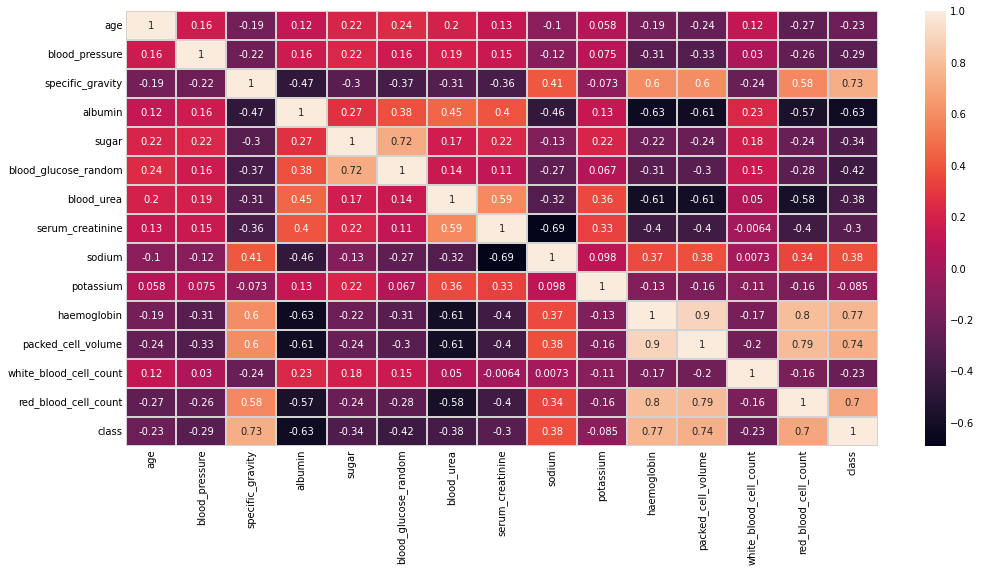

In [0]:
# heatmap of data

plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

In [0]:
df.columns

Out[22]: Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<a id = '2.0'></a>
<p style = "font-size : 40px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Exploratory Data Analysis (EDA)</strong></p> 

In [0]:
# defining functions to create plot

def violin(col):
    fig = px.violin(df, y=col, x="class", color="class", box=True, template = 'plotly_dark')
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(df, hue="class", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()
    
def scatter(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color="class", template = 'plotly_dark')
    return fig.show()

In [0]:
violin('red_blood_cell_count')

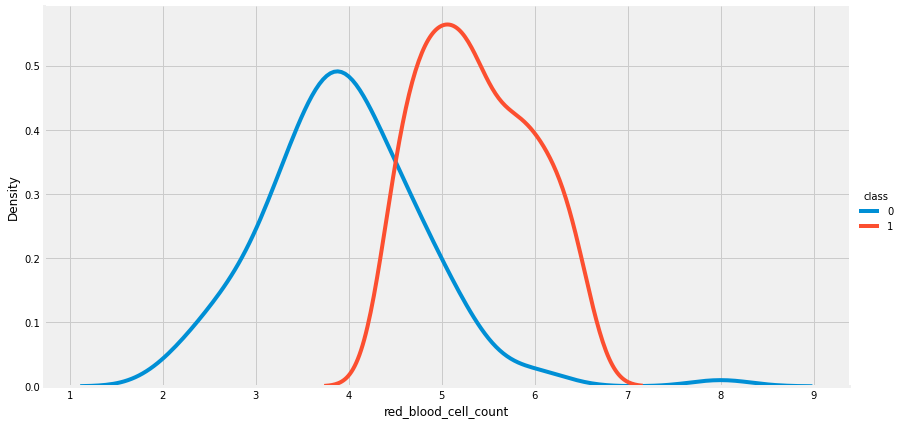

In [0]:
kde('red_blood_cell_count')

In [0]:
violin('white_blood_cell_count')

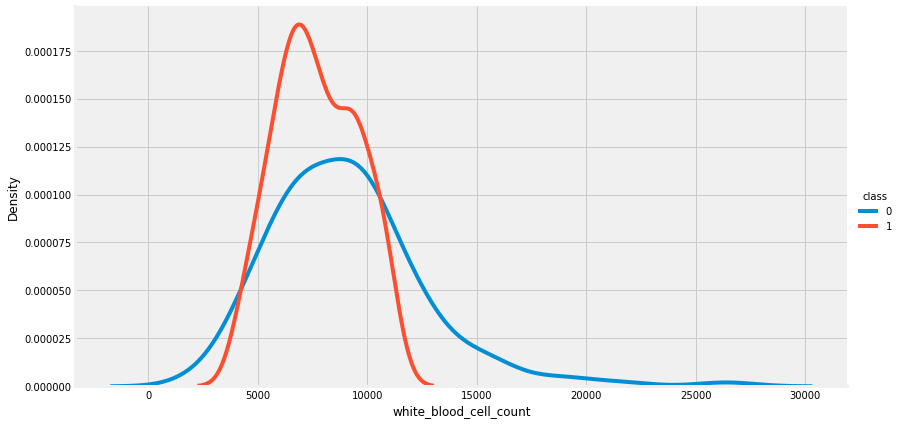

In [0]:
kde('white_blood_cell_count')

In [0]:
violin('packed_cell_volume')

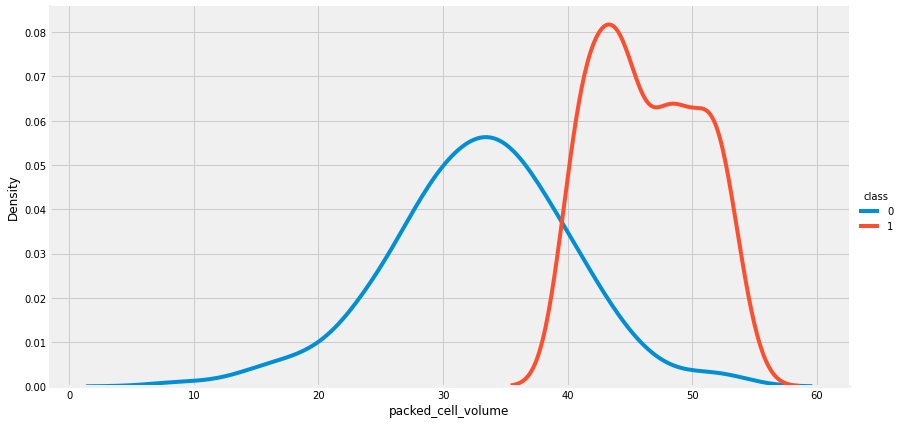

In [0]:
kde('packed_cell_volume')

In [0]:
violin('haemoglobin')

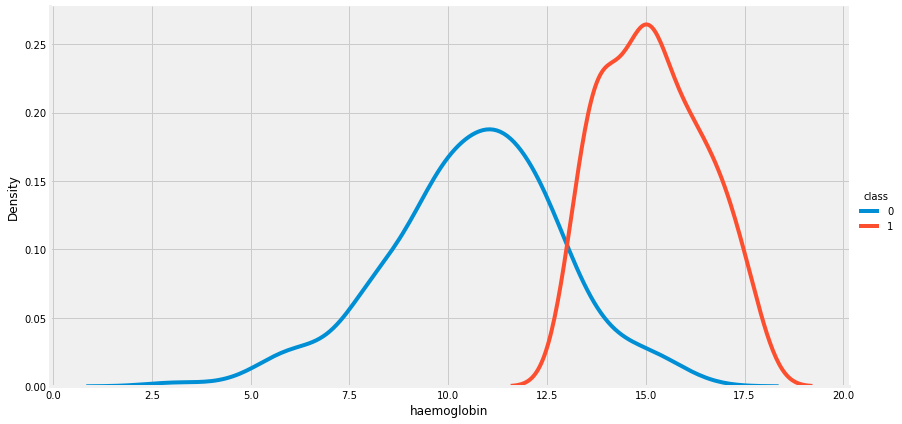

In [0]:
kde('haemoglobin')

In [0]:
violin('albumin')

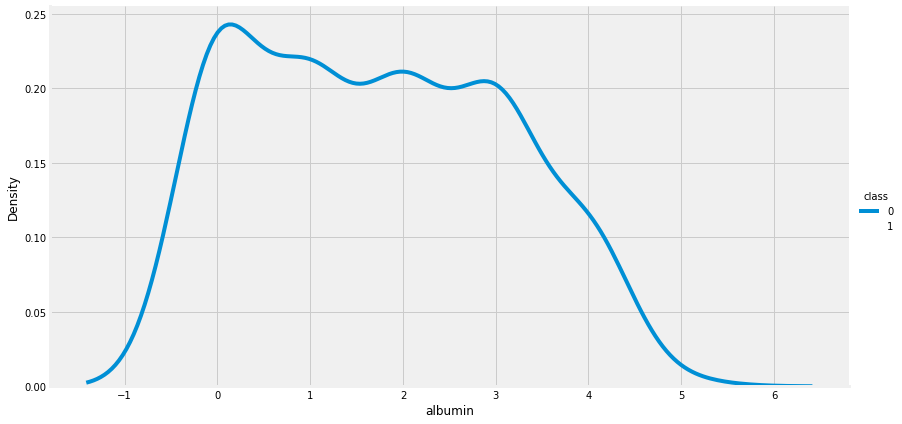

In [0]:
kde('albumin')

In [0]:
violin('blood_glucose_random')

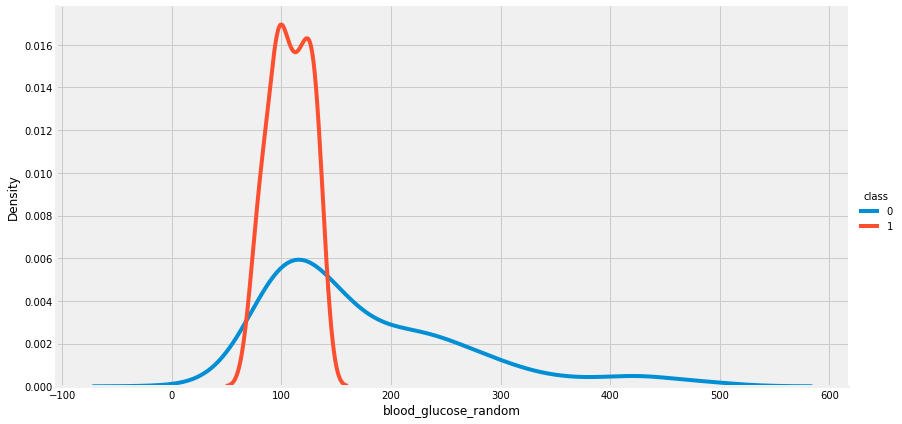

In [0]:
kde('blood_glucose_random')

In [0]:
violin('sodium')

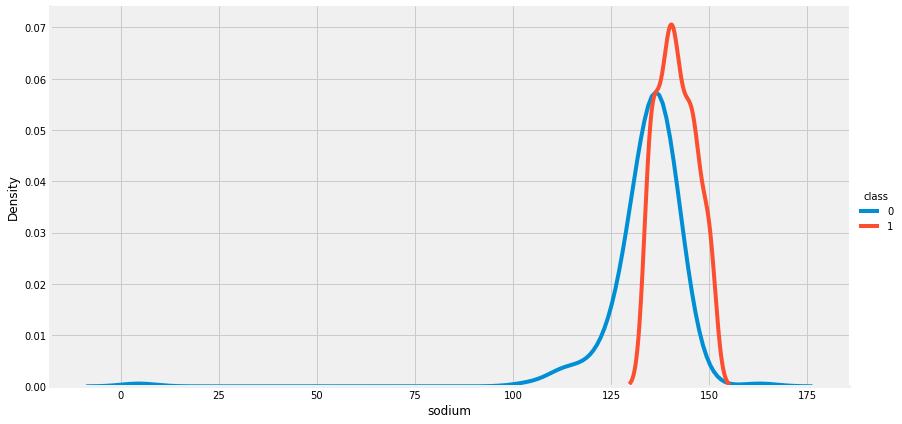

In [0]:
kde('sodium')

In [0]:
violin('blood_urea')

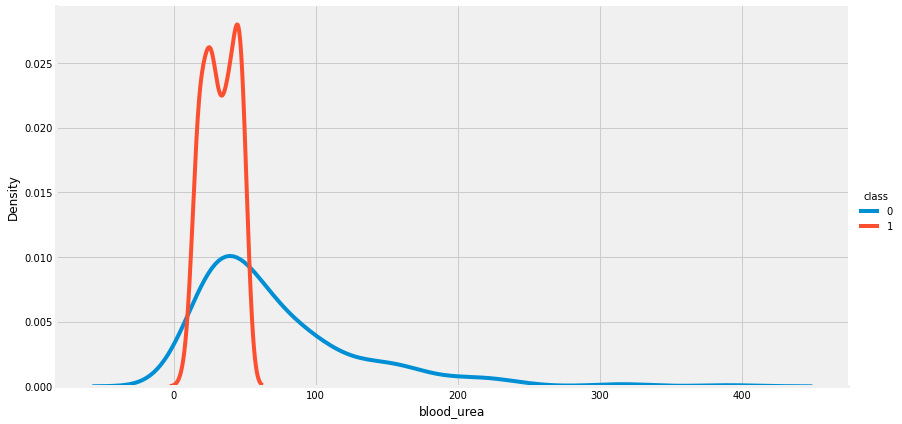

In [0]:
kde('blood_urea')

In [0]:
violin('specific_gravity')

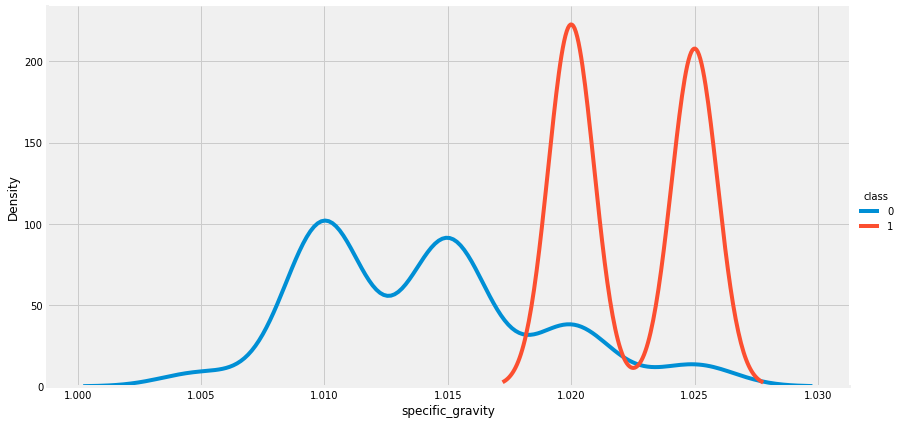

In [0]:
kde('specific_gravity')

In [0]:
scatter('haemoglobin', 'packed_cell_volume')

In [0]:
scatter('red_blood_cell_count', 'packed_cell_volume')

In [0]:
scatter('red_blood_cell_count', 'albumin')

In [0]:
scatter('sugar', 'blood_glucose_random')

In [0]:
scatter('packed_cell_volume','blood_urea')

In [0]:
px.bar(df, x="specific_gravity", y="packed_cell_volume", color='class', barmode='group', template = 'plotly_dark', height = 400)

In [0]:
px.bar(df, x="specific_gravity", y="albumin", color='class', barmode='group', template = 'plotly_dark', height = 400)

In [0]:
px.bar(df, x="blood_pressure", y="packed_cell_volume", color='class', barmode='group', template = 'plotly_dark', height = 400)

In [0]:
px.bar(df, x="blood_pressure", y="haemoglobin", color='class', barmode='group', template = 'plotly_dark', height = 400)

<a id = '3.0'></a>
<p style = "font-size : 40px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Data Pre Processing</strong></p> 

In [0]:
# checking for null values

df.isna().sum().sort_values(ascending = False)

Out[51]: red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [0]:
df[num_cols].isnull().sum()

Out[52]: age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [0]:
df[cat_cols].isnull().sum()

Out[53]: red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [0]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [0]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [0]:
df[num_cols].isnull().sum()

Out[56]: age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [0]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [0]:
df[cat_cols].isnull().sum()

Out[58]: red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>All the missing values are handeled now, lets do ctaegorical features encding now</strong></p> 

<a id = '4.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Feature Encoding</strong></p> 

In [0]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>As all of the categorical columns have 2 categories we can use label encoder</strong></p> 

In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [0]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,142.0,3.5,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,146.0,18.0,0.8,142.0,3.5,11.3,38.0,6000.0,3.1,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,139.0,4.4,9.6,31.0,7500.0,4.1,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,146.0,2.5,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


<a id = '5.0'></a>
<p style = "font-size : 45px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Model Building</strong></p> 

In [0]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

In [0]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

<a id = '5.1'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>KNN</strong></p> 

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.7714285714285715
Test Accuracy of KNN is 0.7333333333333333 

Confusion Matrix :- 
[[55 17]
 [15 33]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.79      0.76      0.77        72
           1       0.66      0.69      0.67        48

    accuracy                           0.73       120
   macro avg       0.72      0.73      0.72       120
weighted avg       0.74      0.73      0.73       120



<a id = '5.2'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Decision Tree Classifier</strong></p> 

In [0]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9583333333333334 

Confusion Matrix :- 
[[70  2]
 [ 3 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.96      0.94      0.95        48

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120



In [0]:
# hyper parameter tuning of decision tree 

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
Out[66]: GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [0]:
# best parameters and best score

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
0.9821428571428573


In [0]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9857142857142858
Test Accuracy of Decision Tree Classifier is 0.95 

Confusion Matrix :- 
[[71  1]
 [ 5 43]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.98      0.90      0.93        48

    accuracy                           0.95       120
   macro avg       0.96      0.94      0.95       120
weighted avg       0.95      0.95      0.95       120



<a id = '5.3'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Random Forest Classifier</strong></p>

In [0]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.9833333333333333 

Confusion Matrix :- 
[[72  0]
 [ 2 46]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



<a id = '5.4'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Ada Boost Classifier</strong></p>

In [0]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, ada.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, ada.predict(X_test))}")

Training Accuracy of Ada Boost Classifier is 1.0
Test Accuracy of Ada Boost Classifier is 0.9916666666666667 

Confusion Matrix :- 
[[72  0]
 [ 1 47]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



<a id = '5.5'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Gradient Boosting Classifier</strong></p>

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 0.9583333333333334 

Confusion Matrix :- 
[[70  2]
 [ 3 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.96      0.94      0.95        48

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120



<a id = '5.6'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Stochastic Gradient Boosting (SGB)</strong></p>

In [0]:
sgb = GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)
sgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")

Training Accuracy of Stochastic Gradient Boosting is 1.0
Test Accuracy of Stochastic Gradient Boosting is 0.9583333333333334 

Confusion Matrix :- 
[[71  1]
 [ 4 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.98      0.92      0.95        48

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120



<a id = '5.7'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>XgBoost</strong></p>

In [0]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XgBoost is 1.0
Test Accuracy of XgBoost is 0.95 

Confusion Matrix :- 
[[70  2]
 [ 4 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.96      0.92      0.94        48

    accuracy                           0.95       120
   macro avg       0.95      0.94      0.95       120
weighted avg       0.95      0.95      0.95       120



<a id = '5.8'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Cat Boost Classifier</strong></p>

In [0]:
!pip install catboost


     |█▏                              | 3.6 MB 6.6

*** WARNING: max output size exceeded, skipping output. ***

     |████████████████████████████████| 98.7 MB 50 kB/s 
     |████████████████████████████████| 47 kB 4.5 MB/s 
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-beb7a486-5f53-4341-8911-e76104cf8c88/bin/python -m pip install --upgrade pip' command.


In [0]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train)

Learning rate set to 0.408198
0:	learn: 0.3093445	total: 49.3ms	remaining: 443ms
1:	learn: 0.1754020	total: 51.4ms	remaining: 205ms
2:	learn: 0.0940845	total: 53.4ms	remaining: 125ms
3:	learn: 0.0645197	total: 55.8ms	remaining: 83.7ms
4:	learn: 0.0484783	total: 58ms	remaining: 58ms
5:	learn: 0.0414114	total: 60.2ms	remaining: 40.2ms
6:	learn: 0.0295859	total: 62.9ms	remaining: 27ms
7:	learn: 0.0247185	total: 65.2ms	remaining: 16.3ms
8:	learn: 0.0198278	total: 67.6ms	remaining: 7.51ms
9:	learn: 0.0172213	total: 70ms	remaining: 0us
Out[79]: <catboost.core.CatBoostClassifier at 0x7f3e23d62eb0>

In [0]:
# accuracy score, confusion matrix and classification report of cat boost

cat_acc = accuracy_score(y_test, cat.predict(X_test))

print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(y_train, cat.predict(X_train))}")
print(f"Test Accuracy of Cat Boost Classifier is {cat_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, cat.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, cat.predict(X_test))}")

Training Accuracy of Cat Boost Classifier is 1.0
Test Accuracy of Cat Boost Classifier is 0.975 

Confusion Matrix :- 
[[71  1]
 [ 2 46]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.96      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



<a id = '5.9'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Extra Trees Classifier</strong></p>

In [0]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.975 

Confusion Matrix :- 
[[72  0]
 [ 3 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.94      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



<a id = '5.10'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>LGBM Classifier</strong></p>

In [0]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")

print(f"{confusion_matrix(y_test, lgbm.predict(X_test))}\n")
print(classification_report(y_test, lgbm.predict(X_test)))

Training Accuracy of LGBM Classifier is 1.0
Test Accuracy of LGBM Classifier is 0.9833333333333333 

[[72  0]
 [ 2 46]]

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



<a id = '6.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Models Comparison</strong></p> 

In [0]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'Stochastic Gradient Boosting', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier'],
    'Score' : [knn_acc, dtc_acc, rd_clf_acc, ada_acc, gb_acc, sgb_acc, xgb_acc, cat_acc, etc_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Ada Boost Classifier,0.991667
2,Random Forest Classifier,0.983333
7,Cat Boost,0.975000
8,Extra Trees Classifier,0.975000
4,Gradient Boosting Classifier,0.958333
5,Stochastic Gradient Boosting,0.958333
1,Decision Tree Classifier,0.950000
6,XgBoost,0.950000
0,KNN,0.733333


In [0]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')

<p style = "font-size : 25px; color : #f55c47 ; font-family : 'Comic Sans MS'; "><strong>If you like my work, don't forget to leave an upvote!!</strong></p> 